# Microsoft Films Project
## Final Project Submission
### Author: Samson Kamunyu

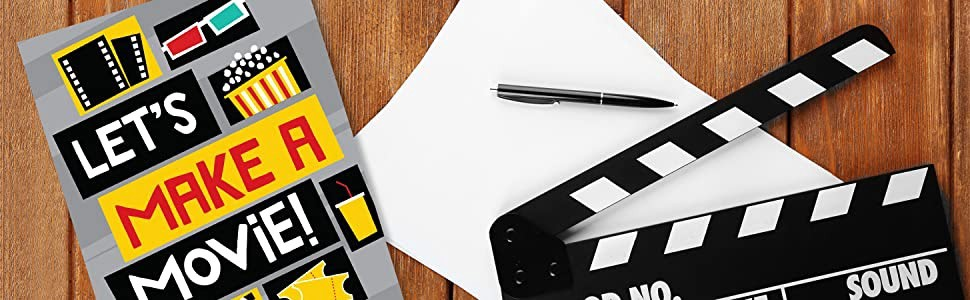

## A study on the movie industry over the past few years and the available opportunities for Microsoft studio to pursue in a quest to produce video content

### Data Understanding and Cleaning

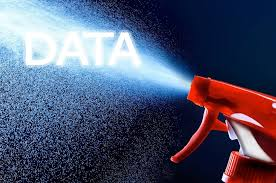

In [90]:
#importing necessary libraries

import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

### BOM Movies Gross Dataset

In [91]:
#loading the data
bomMovie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bomMovie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [92]:
#Checking the column constituents
bomMovie_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [93]:
#Changing the column foreign_gross into a float
bomMovie_gross['foreign_gross'] = bomMovie_gross['foreign_gross'].str.replace(',.', '')
bomMovie_gross['foreign_gross'] = bomMovie_gross['foreign_gross'].map(float)

In [94]:
#Changing the column year into a string
bomMovie_gross['year'] = bomMovie_gross['year'].map(str)

In [95]:
#Confirming the column constituents
bomMovie_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year               object
dtype: object

In [96]:
bomMovie_gross.describe()

,domestic_gross,foreign_gross
count,3.359000e+03,2.037000e+03
mean,2.874585e+07,7.487281e+07
std,6.698250e+07,1.374106e+08
min,1.000000e+02,1.100000e+02
25%,1.200000e+05,3.700000e+06
50%,1.400000e+06,1.870000e+07
75%,2.790000e+07,7.490000e+07
max,9.367000e+08,9.605000e+08


In [97]:
#Checking for missing values in the dataframe
bomMovie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [98]:
#Filling in the missing values with the '.mean()' function
bomMovie_gross.fillna(bomMovie_gross['foreign_gross'].mean(), inplace = True)

In [99]:
#Confirming for any missing values
bomMovie_gross.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [100]:
#Checking for duplicates in the dataframe
bomMovie_gross.duplicated().sum()

0

In [101]:
#Checking the shape of the data set
bomMovie_gross.shape

(3387, 5)

In [102]:
#Getting information on the data set
bomMovie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   object 
dtypes: float64(2), object(3)
memory usage: 132.4+ KB


### Movie Basics Dataset

In [103]:
#Connecting to the Database
conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()

In [104]:
cur.execute('''
SELECT name
FROM sqlite_master
WHERE type = 'table';
''')
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [105]:
mov_bas = pd.read_sql('''
SELECT *
FROM movie_basics
;
''', conn)
mov_bas

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [106]:
#Checking for the 'head()'
mov_bas.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [107]:
#Checking for 'tail()'
mov_bas.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [108]:
#Checking for duplicates
mov_bas.duplicated().sum()

0

In [109]:
#Checking for missing values
mov_bas.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [110]:
#Dropping the missing values
mov_bas.dropna(subset = ['runtime_minutes', 'genres'], inplace = True)

In [111]:
mov_bas_subset = mov_bas[['movie_id', 'start_year', 'runtime_minutes', 'genres']]
mov_bas_subset

,movie_id,start_year,runtime_minutes,genres
0,tt0063540,2013,175.0,"Action,Crime,Drama"
1,tt0066787,2019,114.0,"Biography,Drama"
2,tt0069049,2018,122.0,Drama
4,tt0100275,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,2018,75.0,Comedy
...,...,...,...,...
146134,tt9916160,2019,72.0,Documentary
146135,tt9916170,2019,51.0,Drama
146136,tt9916186,2017,84.0,Documentary
146137,tt9916190,2019,90.0,"Drama,Thriller"


In [112]:
#Checking for any missed duplicates
mov_bas_subset.duplicated().sum()

0

In [113]:
#Checking for missing values in the subset
mov_bas_subset.isna().sum()

movie_id           0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [114]:
#Checking for data information
mov_bas_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112233 entries, 0 to 146139
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         112233 non-null  object 
 1   start_year       112233 non-null  int64  
 2   runtime_minutes  112233 non-null  float64
 3   genres           112233 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 4.3+ MB


In [115]:
#Checking the data set's description
mov_bas_subset.shape

(112233, 4)

### Movie Ratings Dataset

In [116]:
#Connecting to the Database
conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()

In [117]:
mov_rat = pd.read_sql('''
SELECT *
FROM movie_ratings
;
''', conn)
mov_rat

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [118]:
#Checking for the head
mov_rat.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [119]:
#Checking for the tail
mov_rat.tail()

,movie_id,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [120]:
#Checking the description of our data set
mov_rat.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [121]:
#Checking the shape of the data set
mov_rat.shape

(73856, 3)

In [122]:
#Checking the data set's description
mov_rat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


###### We continue breaking a sweat

### Combining Movie Basics and Movie Rating Data Sets

In [123]:
#Joining the Movie Basics and Movie Ratings using the .merge() function
mov_bas_rat = mov_bas.merge(mov_rat, on = 'movie_id', how = 'inner')
mov_bas_rat

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...,...,...
65715,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
65716,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
65717,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
65718,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


In [124]:
#Checking for any duplicates in the dataset
mov_bas_rat.duplicated().sum()

0

In [125]:
#Checking for missing items in our dataset
mov_bas_rat.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [126]:
#Checking the shape of our new data set
mov_bas_rat.shape

(65720, 8)

In [127]:
#Checking the data set's information
mov_bas_rat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 65719
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   averagerating    65720 non-null  float64
 7   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


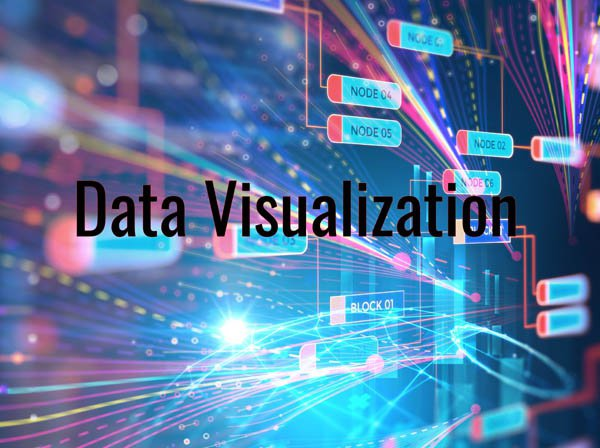

### We are done dealing with our data sets in understanding and cleaning the contents. It is now time we dive in to visualizating the data and make it appealing to the eye to make sense of the communication being driven by our data.

#### Plotting a graph of year vs foreign gross between the year 2010 and 2018

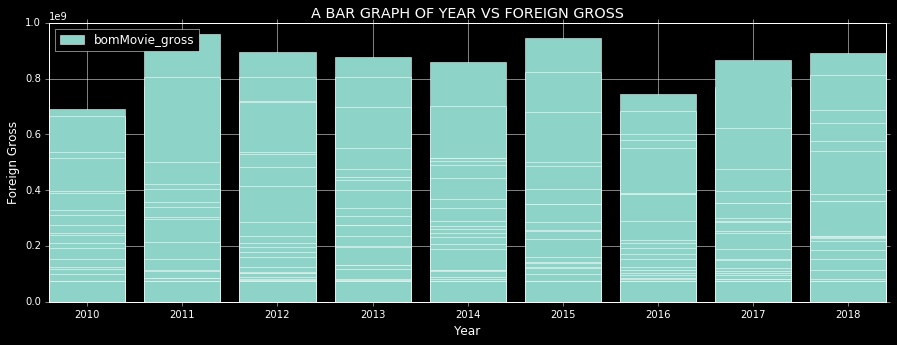

In [136]:
x = bomMovie_gross['year']
y = bomMovie_gross['foreign_gross']

#creating the plot
fig, ax = plt.subplots(figsize = (15, 5))

#using the .bar() function to plot the value
ax.bar(x, y)

#labelling both the x and y axes
ax.set_xlabel('Year')
ax.set_ylabel('Foreign Gross')

#adding a title to the plot
ax.set_title('A BAR GRAPH OF YEAR VS FOREIGN GROSS')

#adding a legend() at the upper left corner i.e loc = 2
ax.legend(['bomMovie_gross'], loc = 2)

plt.style.use('dark_background');

The returns from the last few years have been high. The highest returns were recorded in 2011 which then dropped a little bit but still remained high. This is an indication that foreign markets once pursued have an appetite for video content and will be a good avenue to pursue

#### Plotting a graph of Year vs Domestic Gross between the year 2010 and 2018

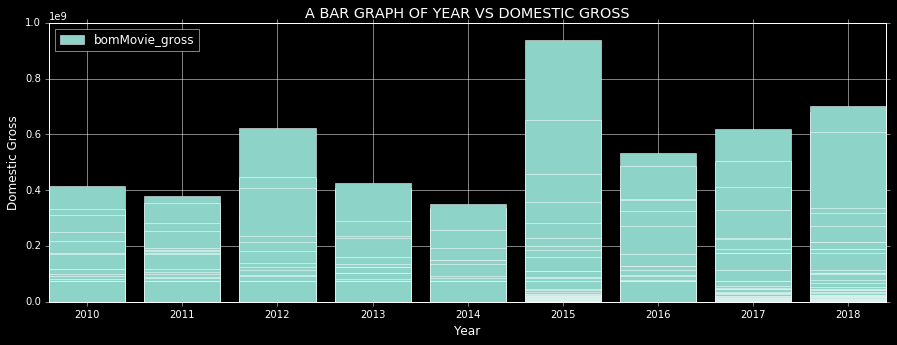

In [135]:
x = bomMovie_gross['year']
y = bomMovie_gross['domestic_gross']

#creating the plot
fig, ax = plt.subplots(figsize = (15, 5))

#using the .bar() function to plot the value
ax.bar(x, y)

#labelling both the x and y axes and title
ax.set_xlabel('Year')
ax.set_ylabel('Domestic Gross')

#adding a title to the plot
ax.set_title('A BAR GRAPH OF YEAR VS DOMESTIC GROSS')

#adding a legend() at the upper left corner i.e loc = 2
ax.legend(['bomMovie_gross'], loc = 2)

plt.style.use('dark_background');

Domestic gross returns have had a high return recorded in 2015. The returns between 2010 and 2014 were relatively below average with a high peak in 2012 and then falling below average. The trend between 2016 to 2018 has been on a relatively increasing returns and above average. This makes it a viable option to pursue the video content market locally. 

#### Plotting a graph of Domestic Gross and Foreign Gross

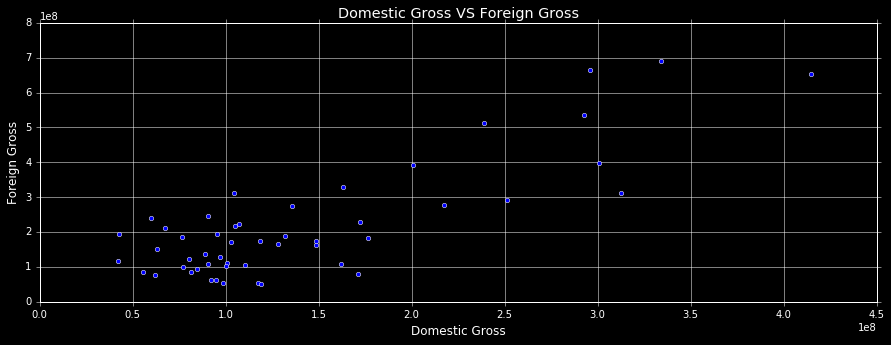

In [144]:
x = bomMovie_gross.domestic_gross[:50]
y = bomMovie_gross.foreign_gross[:50]

#creating the plot
fig, ax = plt.subplots(figsize = (15, 5))

#using the .hist() function to plot the value
ax.scatter(x, y)


#labelling both the x and y axes
ax.set_xlabel('Domestic Gross')
ax.set_ylabel('Foreign Gross')

#adding a title to the plot
ax.set_title('Domestic Gross VS Foreign Gross')

plt.style.use('dark_background');

Domestic gross and foreign gross have a positive correlation. They are both relatively increasing at the same rate as evidenced by the scatter graph.

In [140]:
#Creating a subset of 'mov_bas_rat' data set to generate the required columns required from which we'll draw insights
mov_bas_rat_subset = mov_bas_rat[['genres', 'averagerating']]
mov_bas_rat_subset = mov_bas_rat_subset.sort_values('averagerating', ascending = False)
mov_bas_rat_subset.head(20)

,genres,averagerating
763,"Comedy,Drama",10.0
48436,Documentary,10.0
38900,Documentary,10.0
58850,"Documentary,History",10.0
54672,Documentary,10.0
63823,Documentary,10.0
610,Documentary,10.0
57886,Documentary,10.0
24816,Documentary,10.0
59019,"Adventure,Comedy",10.0


#### Plotting a graph of Genres and Average Rating

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


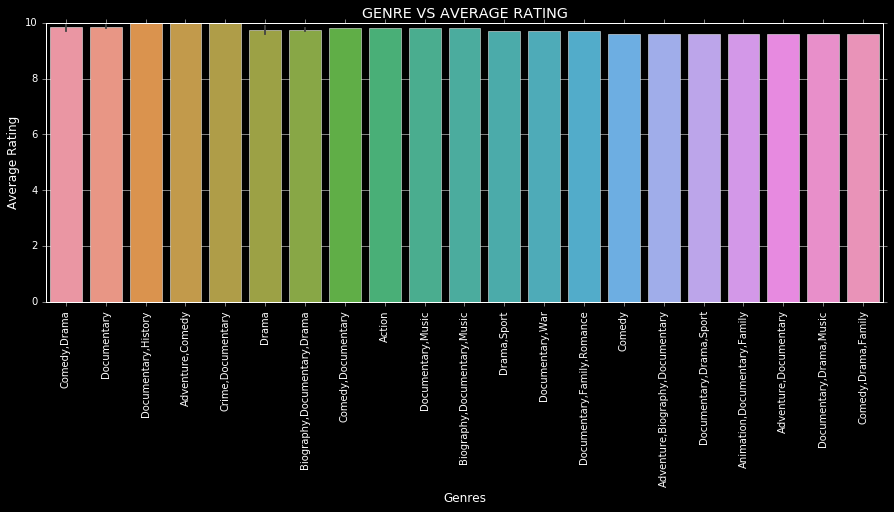

In [142]:
x = mov_bas_rat_subset.genres[:50]
y = mov_bas_rat_subset.averagerating[:50]

#creating the plot
fig, ax = plt.subplots(figsize = (15, 5))

#using the .hist() function to plot the value
#ax.bar(x, y)
sns.barplot(x, y)

#labelling both the x and y axes
ax.set_xlabel('Genres')
ax.set_ylabel('Average Rating')

#adding a title to the plot
ax.set_title('GENRE VS AVERAGE RATING')

ax.tick_params(axis = "x", labelrotation = 90);

These are the top 50 rated movie categories. Comedy,Drama category ranked highest, followed by general Documentary category and Documentary,History category as the second runners-up.